## Test fonction run exp

### 1. Imports

In [1]:

import torch
import stat_reliability_measure.config as config_
from importlib import reload
import matplotlib.pyplot as plt

In [2]:
import stat_reliability_measure.dev.torch_utils as t_u
import stat_reliability_measure.dev.torch_utils2 as t_u2
from stat_reliability_measure.dev.amls.amls_config import MLS_SMC_Config
import stat_reliability_measure.dev.utils as utils
import stat_reliability_measure.run_exp as run_exp
from stat_reliability_measure.config import ExpModelConfig
import stat_reliability_measure.dev.smc.smc_pyt as smc_pyt
import stat_reliability_measure.dev.smc.smc_pyt2 as smc_pyt2

import stat_reliability_measure.dev.smc.smc_config as smc_config
import stat_reliability_measure.dev.smc.smc_config2 as smc_config2

import stat_reliability_measure.dev.amls.amls_pyt as amls_pyt
import stat_reliability_measure.dev.form.form_pyt as form_pyt
import stat_reliability_measure.dev.amls.amls_config as amls_config 
import stat_reliability_measure.dev.mls.webb_config as webb_config
import stat_reliability_measure.dev.form.form_config as form_config
import stat_reliability_measure.dev.mls.amls_uniform as amls_webb
import stat_reliability_measure.dev.mc.mc_pyt as mc_pyt
import stat_reliability_measure.dev.mc.mc_config as mc_config
import stat_reliability_measure.dev.imp_sampling.is_pyt as is_pyt
import stat_reliability_measure.dev.imp_sampling.is_config as is_config
import stat_reliability_measure.dev.torch_arch as t_a

import pandas as pd
import numpy as np
import os 


### 2. Model & Data load

In [3]:
reload(config_)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
config = ExpModelConfig(dataset_name='cifar10',device=device,model_name='resnet18',)

Files already downloaded and verified
input_shape:(3, 32, 32)


In [5]:
config.model

Sequential(
  (0): Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
  (1): ResNet(
    (conv1): Conv2d(3, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlockResNet(
        (conv1): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlockResNet(
        (conv1): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(2, 2, k

In [6]:
config.update()
os.rmdir(config.exp_log_path)

In [7]:
X,y = config.X[:1], config.y[:1]

In [8]:
reload(t_u)

<module 'stat_reliability_measure.dev.torch_utils' from '/home/karimtito/repos/stat_reliability_measure/dev/torch_utils.py'>

In [14]:
config.y[:4]

tensor([3, 0, 6, 6], device='cuda:0')

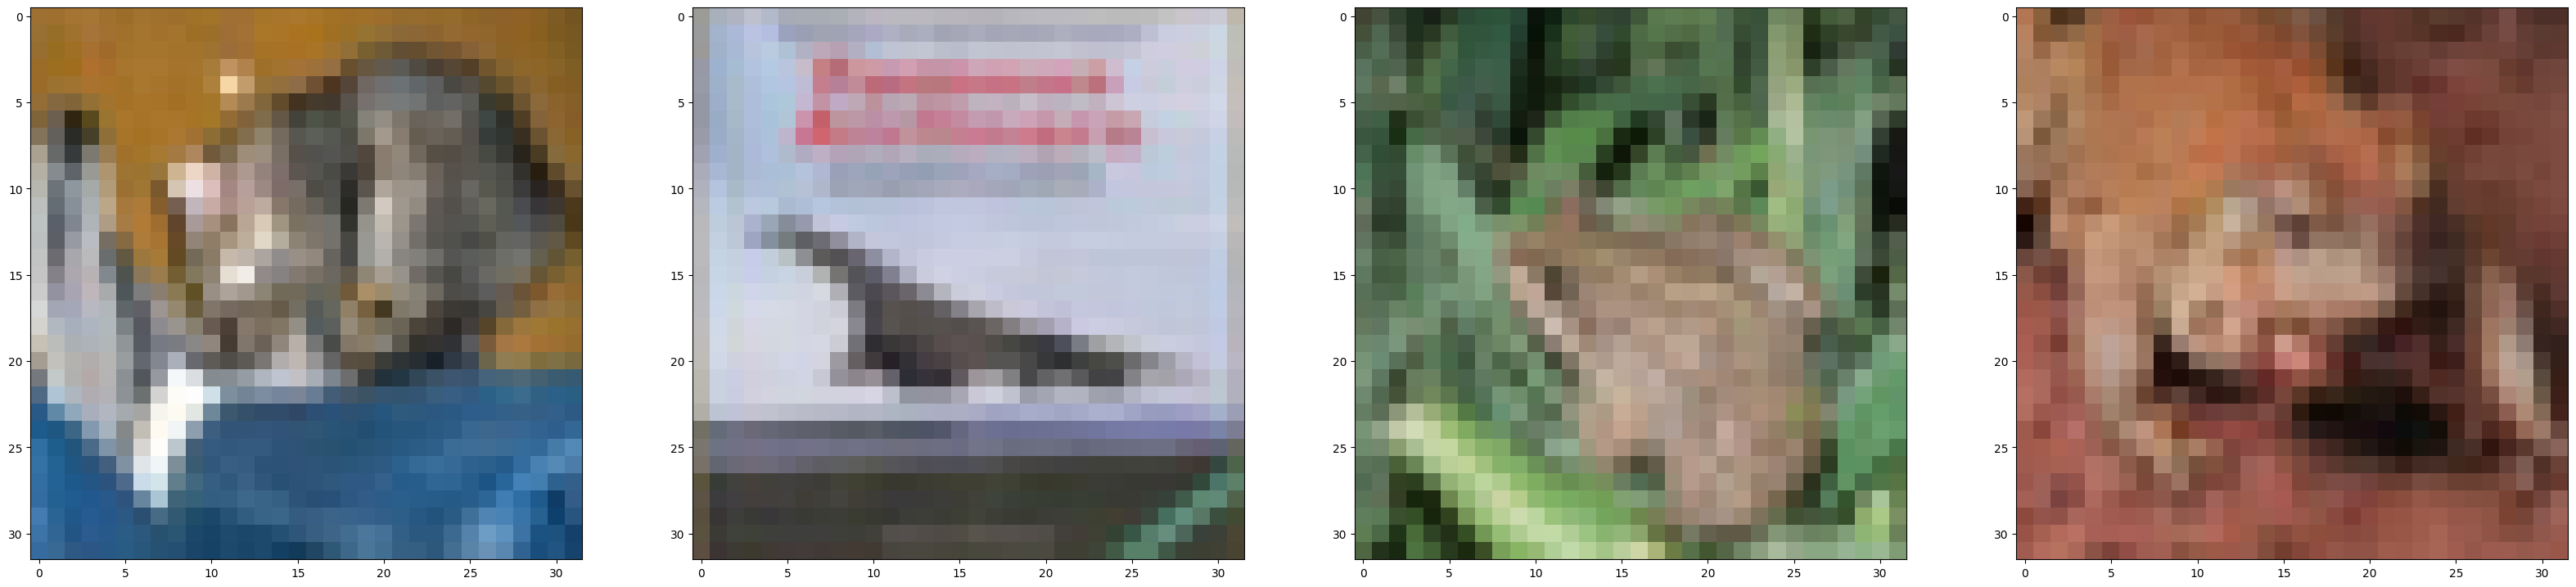

In [12]:
t_u.plot_k_tensor(config.X[:4])

In [12]:
config.sample_accuracy

0.6875

## 3. Experiments with MALA-SMC, MLS-SMC, Importance Sampling, FORM and Line Sampling

In [9]:
epsilon_range=[0.2,0.3]
dataset='cifar10'
n_rep = 100 
method_ref='mala2'
method_ref_name='MALA_SMC'
N_ref = 1000
T_ref = 20
ess_ref = 0.8
alpha_ref = 0.2
n_rep_ref = 400
img_idx = 0
agg_res_df = pd.read_csv('../logs/exp_model_mnist/aggr_res.csv')

In [10]:
X.requires_grad = True

In [11]:
x_0 = X[0]

with parameters in {'N_range': [4000], 'T_range': [200], 'ess_alpha_range': [0.8], 'alpha_range': [0.2], 'L_range': [1]}
Experiment already done for method: MALA_SMC
Starting MALA_SMC simulation 1/1, with model: model, img_idx:0,eps:0.18, N: 4000: T: 200: ess_alpha: 0.8: alpha: 0.2: L: 1


100%|██████████| 400/400 [05:17<00:00,  1.26it/s]


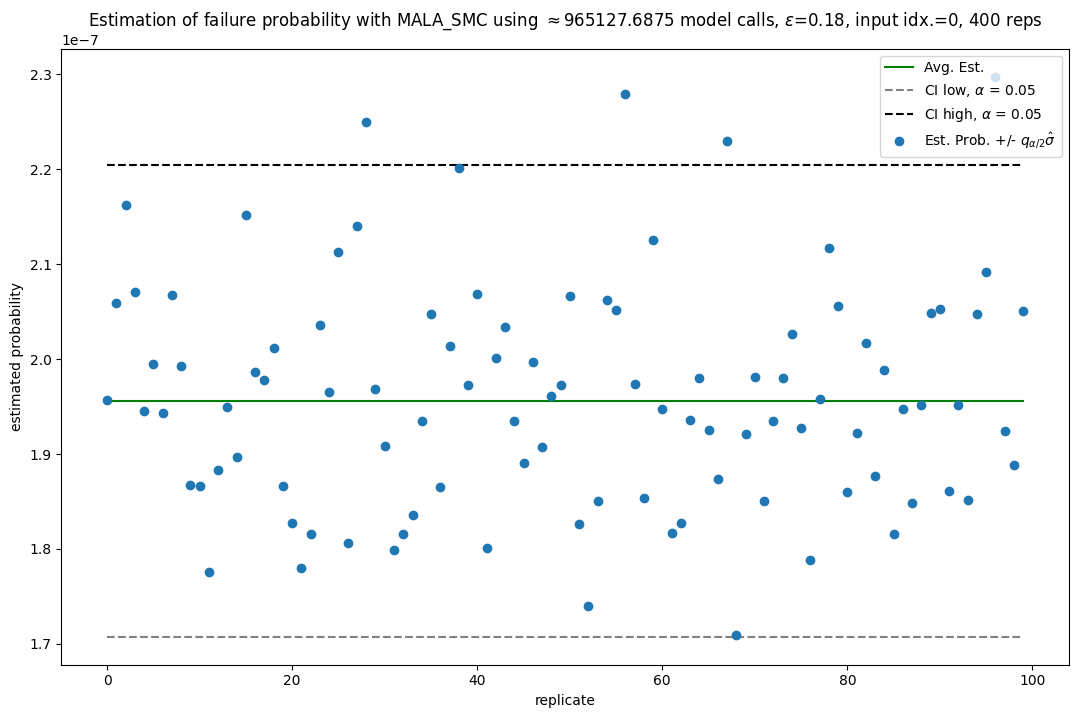

mean est:1.9561531956924229e-07, std est:1.268714960876063e-08
mean calls:965127.6875
std. re.:331557.1014283532
std. rel. adj.:319994938575.7495


In [12]:
p_ref, dict_out = run_exp.run_est(model=model,X=X,y=y, input_idx=img_idx,noise_dist ='gaussian',
                                                repeat_exp=False, track_dt=False,input_index=0,
                                             method='mala2', dataset_name=dataset,
                                             n_rep=n_rep_ref,
                                epsilon_range=epsilon_range, update_aggr_res=True ,
                                track_accept=False,
                                N_range=[N_ref], T_range =[T_ref],ess_alpha = ess_ref,
                                alpha=alpha_ref)

/tmp/ipykernel_5343/92554365.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['mean_log10_est'] = ref_data['mean_log_est']/np.log(10)
/tmp/ipykernel_5343/92554365.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['std_log10_est'] = ref_data['std_log_est']/np.log(10)


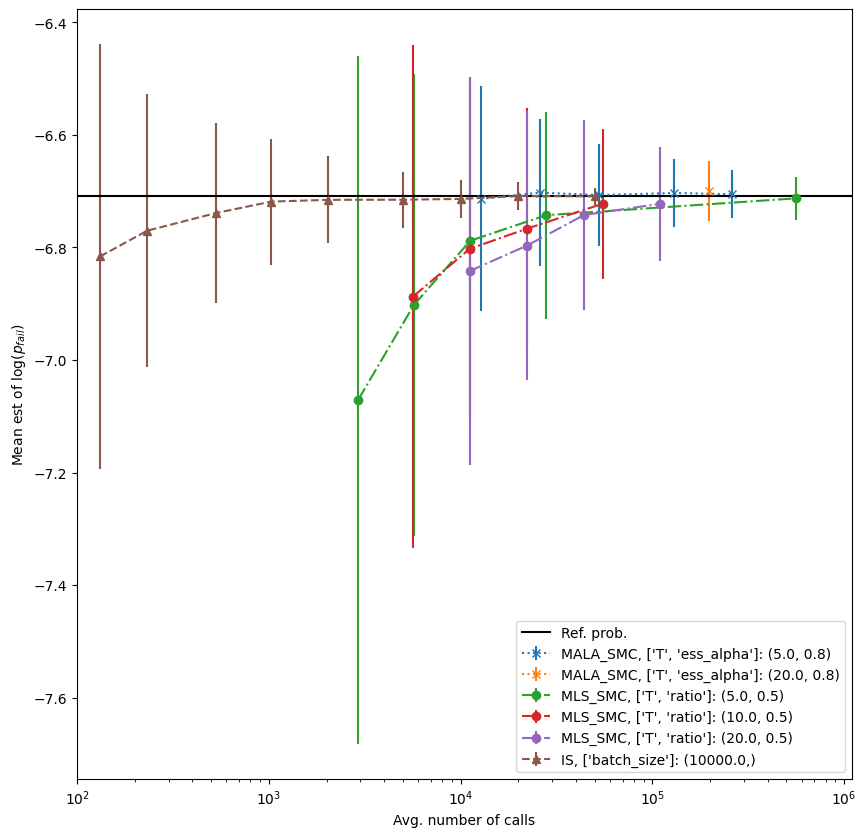

In [37]:
ref_data = utils.get_sel_df(agg_res_df,triplets=[('n_rep',n_rep_ref,'='),('epsilon',epsilon_range[0],'='),])
param_methods_dict = {'MLS_SMC':['T','N','alpha','ess_alpha'],
                      'MALA_SMC':['T','N','alpha','ess_alpha'],
                      'IS':['N','batch_size'],}
param_methods_ex_N = {'IS':['batch_size'],
                      'MLS_SMC':['T','ratio',],
                      'MALA_SMC':['T','ess_alpha',],
                      }
cond_methods_dict = {'MLS_SMC':[('T',5,'>='),('N',2,'>='),('ratio',0.5,'=='),('T',100,'<='),],
                     'MALA_SMC':[('T',5,'>='),('N',2,'>='),('ess_alpha',0.8,'=='),('T',100,'<=')],
                        'IS':[('batch_size',int(1e4),'==')],
                                }

calls_max = 1e6
max_exp_by_method=3
ref_data['mean_log10_est'] = ref_data['mean_log_est']/np.log(10)
ref_data['std_log10_est'] = ref_data['std_log_est']/np.log(10)
mode_y = 'log10' 
x_variable = 'mean_calls'
if mode_y == 'log10':
    y_variable= 'mean_log10_est'
    y_error = 'std_log10_est'
    
elif mode_y == 'log':
    y_variable= 'mean_log_est'
    y_error = 'std_log_est'
else:
    y_variable= 'mean_est'
    y_error = 'std_est'
methods_grouped={}
max_calls=0
plot_traits = {'MLS_SMC':{'marker':'o','linestyle':'-.',},
               'MALA_SMC':{'marker':'x','linestyle':':',},
                'IS':{'marker':'^','linestyle':'--'},
                }

min_calls = 1e10
plt.figure(figsize=(10,10),)
for method in ref_data['method_name'].unique():
    cond_method = cond_methods_dict[method]
    method_df = utils.get_sel_df(ref_data,triplets=[('method_name',method,'=')]+cond_method+[(x_variable,calls_max,'<=')])
    params = param_methods_ex_N[method]
    method_df_grouped = method_df.groupby(params)
    methods_grouped[method] = list(method_df_grouped)
    i = 0
    for values,df in method_df_grouped:
        if i > max_exp_by_method:
            break
        df = df .drop_duplicates(subset=['N'])
        df = df.sort_values(by=x_variable)
        
        log_mean_calls = np.log(df[x_variable].values)
        plt.errorbar(df[x_variable],df[y_variable],yerr=df[y_error],
                     label=f"{method}, {params}: {values}",**plot_traits[method])
        plt.xscale('log')
        plt.ylabel(r'Mean est of $\log(p_{fail})$')
        plt.xlabel('Avg. number of calls')
        
        i+=1
        max_calls=max(max_calls,df[x_variable].max())
        min_calls = min(min_calls,df[x_variable].min())
if p_ref is not None:
    #using a different marker and linestyle for the reference method
    plt.axhline(y=np.log10(p_ref),label='Ref. prob.',color='k',linestyle='-')
plt.xlim([1e2,1.1e6])
plt.legend(loc='lower right')
    # for params_value in method_df[params].unique():
    #     print(f"method: {method}, params: {params}, params_value: {params_value}")
    # param_df = param_df.sort_values(by=x_variable)
    # plt.errorbar(param_df[x_variable],param_df['mean_est'],yerr=param_df[y_error],label=param)


In [41]:
reload(amls_config)
reload(config_)
reload(webb_config)
reload(amls_webb)
reload(amls_pyt)
reload(smc_pyt)
reload(smc_pyt2)
reload(smc_config2)
reload(t_u2)
reload(run_exp)
reload(form_config)
reload(t_u)
reload(form_pyt)
reload(is_pyt)
reload(is_config)
reload(mc_config)
reload(mc_pyt)

<module 'stat_reliability_measure.dev.mc.mc_pyt' from '/home/karimtito/repos/stat_reliability_measure/dev/mc/mc_pyt.py'>

with parameters in {'steps_range': [40], 'num_iter_range': [500], 'stepsize_range': [0.1]}
Experiment already done for method: FORM
Starting FORM simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18, steps: 40: num_iter: 500: stepsize: 0.1


  0%|          | 0/5 [00:00<?, ?it/s]

Random init with sigma_init=0.0


 20%|██        | 1/5 [00:04<00:18,  4.66s/it]

Random init with sigma_init=0.0


 40%|████      | 2/5 [00:09<00:13,  4.47s/it]

Random init with sigma_init=0.0


 60%|██████    | 3/5 [00:14<00:09,  4.90s/it]

Random init with sigma_init=0.0


 80%|████████  | 4/5 [00:19<00:04,  4.96s/it]

Random init with sigma_init=0.0


100%|██████████| 5/5 [00:23<00:00,  4.73s/it]


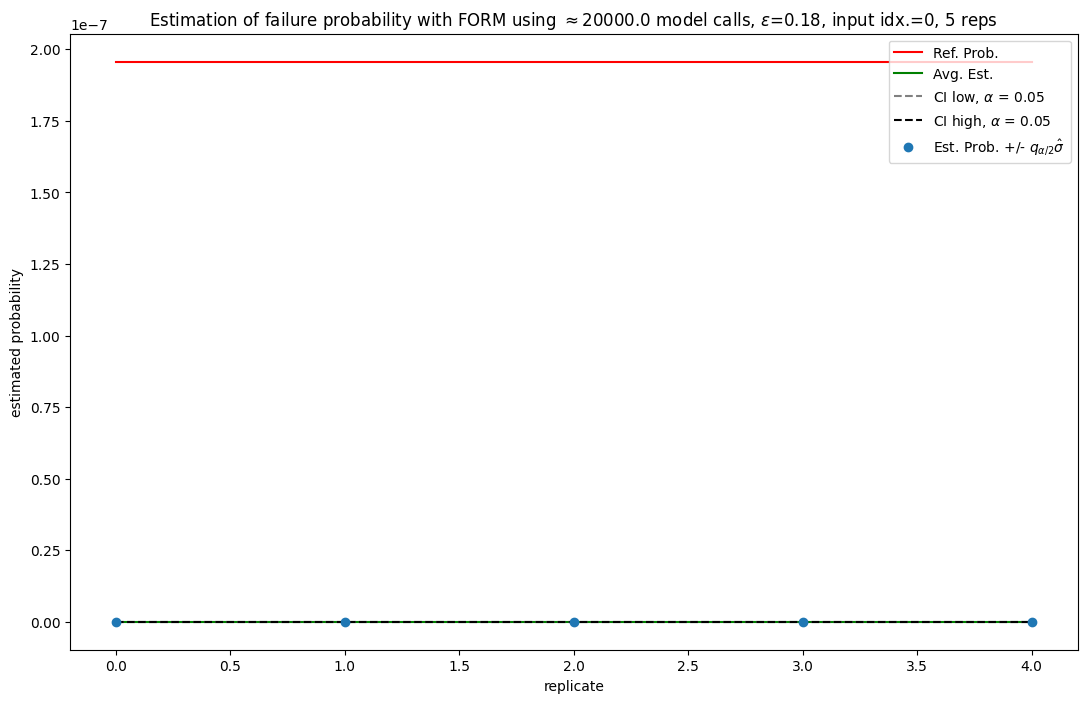

mean est:9.033982806723124e-18, std est:0.0
mean calls:20000.0
std. re.:0.0
std. rel. adj.:0.0
mean rel. error:0.9999999999538298
std rel. error:0.0
stat performance (per 1k calls):0.0


In [48]:
p_fail_form,dict_out_form = run_exp.run_est(model=model,X=X,y=y,method='form',dataset_name='mnist',random_init=True,n_rep=5, epsilon_range=epsilon_range,
                                            sigma_init=0.00,  stepsize=0.1,
                                            steps=40,num_iter=500 ,repeat_exp=False, real_uniform=True, p_ref=p_ref, update_aggr_res=True,)


with parameters in {'N_range': [100], 'T_range': [5], 'ess_alpha_range': [0.8], 'alpha_range': [0.25], 'L_range': [1]}
Starting MALA_SMC simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18, N: 100: T: 5: ess_alpha: 0.8: alpha: 0.25: L: 1


100%|██████████| 40/40 [00:14<00:00,  2.81it/s]


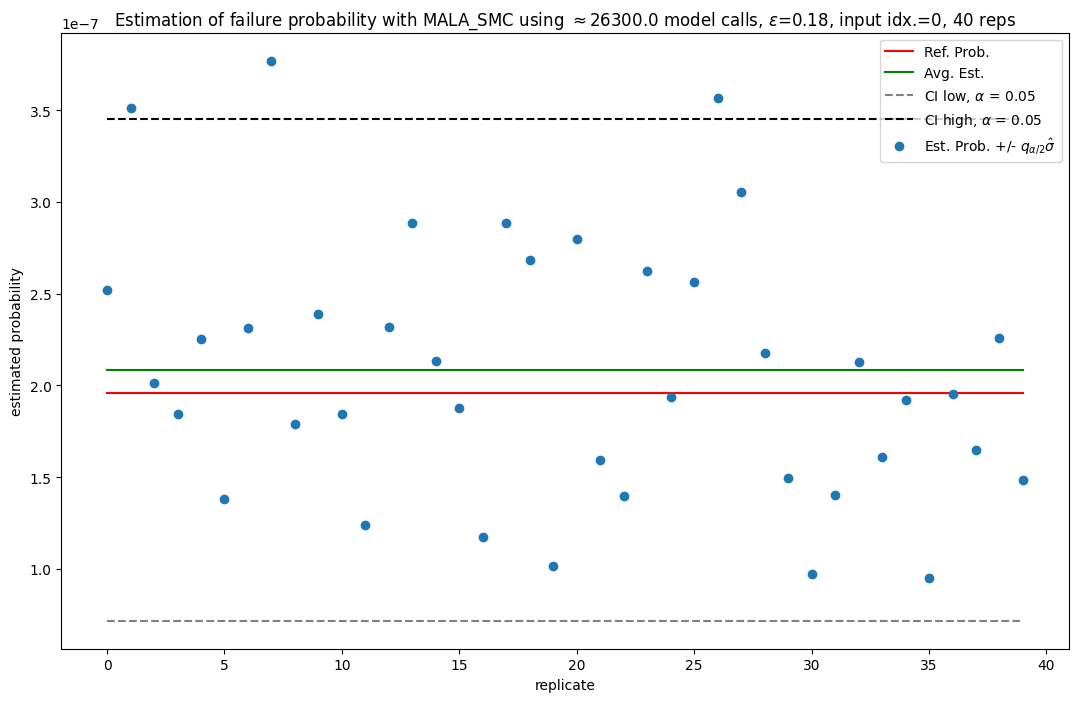

mean est:2.084633822008186e-07, std est:6.974985857693233e-08
mean calls:26300.0
std. re.:1605032.282927081
std. rel. adj.:42212349040.98223
mean rel. error:0.28475811295045467
std rel. error:0.22315087190523203
stat performance (per 1k calls):5.868867931107602
p_fail_mala=2.084633822008186e-07


In [44]:
N_range_low = [50,100,200,500]
N_range_high = [1000,2000,5000,10000]
N_range = N_range_low + N_range_high

p_fail_mala, dict_out=run_exp.run_est(model=model,method='mala2',X=X,y=y,dataset_name='mnist',
                        n_rep=40, verbose=0, track_accept=False,ess_alpha_range=[0.8],
                        alpha=0.25, L_range=[1], only_duplicated=False,p_ref=p_ref,
                         N=100,T_range=[5],epsilon_range=epsilon_range,
                         repeat_exp=True,
 )


exp_config,method_config_mala, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mala = dict_out['results_df']
print(f"p_fail_mala={p_fail_mala}")

In [20]:
N_range_low = [50,100,200,500]
N_range_high = [1000,2000,5000,10000]
N_range = N_range_low + N_range_high
T_range_low= [2,5,10,20]
T_range_high = [50,100,200,500]
T_range = T_range_low + T_range_high
p_fail_mls,dict_out=run_exp.run_est(model=model,method='amls_batch',X=X,y=y,dataset_name=dataset,
                        epsilon_range=epsilon_range, n_rep=400, update_aggr_res=True, 
                         N_range=N_range_low,T_range=T_range_low,ratio_range=[0.5,],repeat_exp=False,
                        verbose=0,np_seed=0, torch_seed=0,p_ref = p_ref)
exp_config,method_config_mls, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mls = dict_out['results_df']
print(f"p_fail_mls: {p_fail_mls}")

with parameters in {'N_range': [50, 100, 200, 500], 'T_range': [2, 5, 10, 20], 'ratio_range': [0.5], 's_range': [1.0]}
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 1/16, with model: mnist_model, img_idx:0,eps:0.18,N: 50: T: 2: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 2/16, with model: mnist_model, img_idx:0,eps:0.18,N: 50: T: 5: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 3/16, with model: mnist_model, img_idx:0,eps:0.18,N: 50: T: 10: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 4/16, with model: mnist_model, img_idx:0,eps:0.18,N: 50: T: 20: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 5/16, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 2: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 6/16, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 5: ratio: 0.5: s:

with parameters in {'N_range': [10000], 'batch_size_range': [2000]}
Starting IS simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18, N: 10000: batch_size: 2000


  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [00:10<00:00, 38.36it/s]


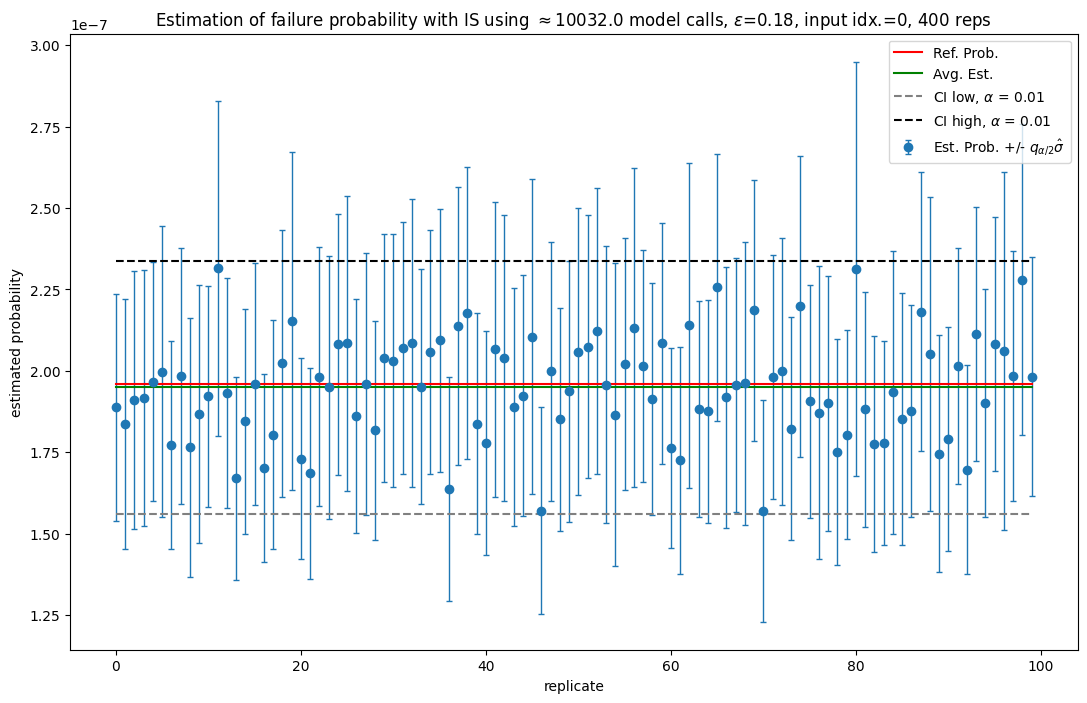

mean est:1.9499888992413617e-07, std est:1.5061546676520265e-08
mean calls:10032.0
std. re.:396100.4118243215
std. rel. adj.:3973679331.421593
mean rel. error:0.062050651758909225
std rel. error:0.04562896862626076
stat performance (per 1k calls):0.45774981325864794
p_fail_mls: 1.9499888992413617e-07


In [38]:
N_range_high=[5000,10000,20000,50000,10000]
N_range_low = [100,200,500,1000,2000,]
p_fail_mls,dict_out=run_exp.run_est(model=model,method='is',X=X,y=y,dataset_name=dataset, p_ref=p_ref,
                        epsilon_range=epsilon_range, n_rep=400, update_aggr_res=True, save_weights=True,
                         N_range=[10000],batch_size_range=[2000],repeat_exp=True,alpha_CI=0.01,
                        verbose=0,np_seed=0, torch_seed=0,sigma_bias=1.)
exp_config,method_config_mls, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mls = dict_out['results_df']
weights_list = dict_out['weights_list']
print(f"p_fail_mls: {p_fail_mls}")

(array([9.637e+03, 1.000e+02, 7.100e+01, 4.300e+01, 3.700e+01, 2.500e+01,
        1.200e+01, 1.400e+01, 1.200e+01, 9.000e+00, 7.000e+00, 5.000e+00,
        5.000e+00, 1.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.00052045, 0.00104089, 0.00156134, 0.00208179,
        0.00260224, 0.00312268, 0.00364313, 0.00416358, 0.00468402,
        0.00520447, 0.00572492, 0.00624537, 0.00676581, 0.00728626,
        0.00780671, 0.00832715, 0.0088476 , 0.00936805, 0.0098885 ,
        0.01040894, 0.01092939, 0.01144984, 0.01197028, 0.01249073,
        0.01301118, 0.01353163, 0.01405207, 0.01457252, 0.01509297,
        0.01561341, 0.01613386, 0.01665431, 0.01717476, 0.0176952 ,
        0.01821565, 0.0187

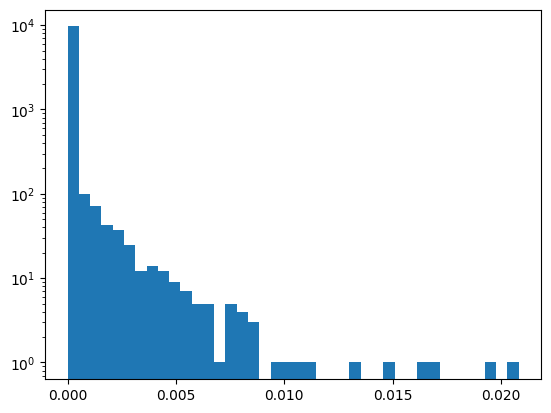

In [39]:
weights0=weights_list[0]
normalized_weights=weights0/weights0.sum()
#plot histgram of the weights with log scale between 1e-5 and 1e-1
plt.hist(normalized_weights,bins=40,log=True)

In [36]:
weights_list

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        5.0462313e-06, 0.0000000e+00], dtype=float32),
 array([0.0000000e+00, 4.1689436e-06, 3.9775614e-07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 

with parameters in {'N_range': [100, 100, 10000], 'T_range': [2, 5, 10, 20], 'ratio_range': [0.2, 0.5, 0.8], 's_range': [1.0]}
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 1/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:03<00:00, 110.30it/s]


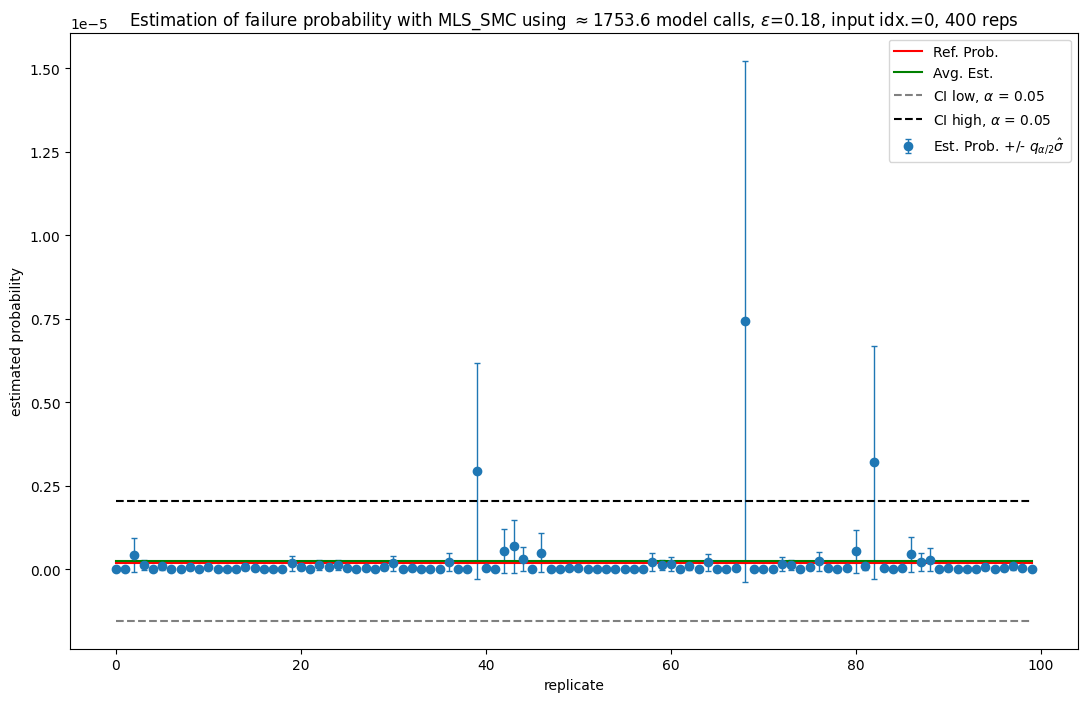

mean est:2.5447429269094413e-07, std est:9.130619251906983e-07
mean calls:1753.6
std. re.:14099782.103787187
std. rel. adj.:24725377897.20121
mean rel. error:1.5945627399173044
std rel. error:4.419012451802254
stat performance (per 1k calls):7.7491802354804316
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 2/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 2: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 3/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:23<00:00, 17.28it/s]


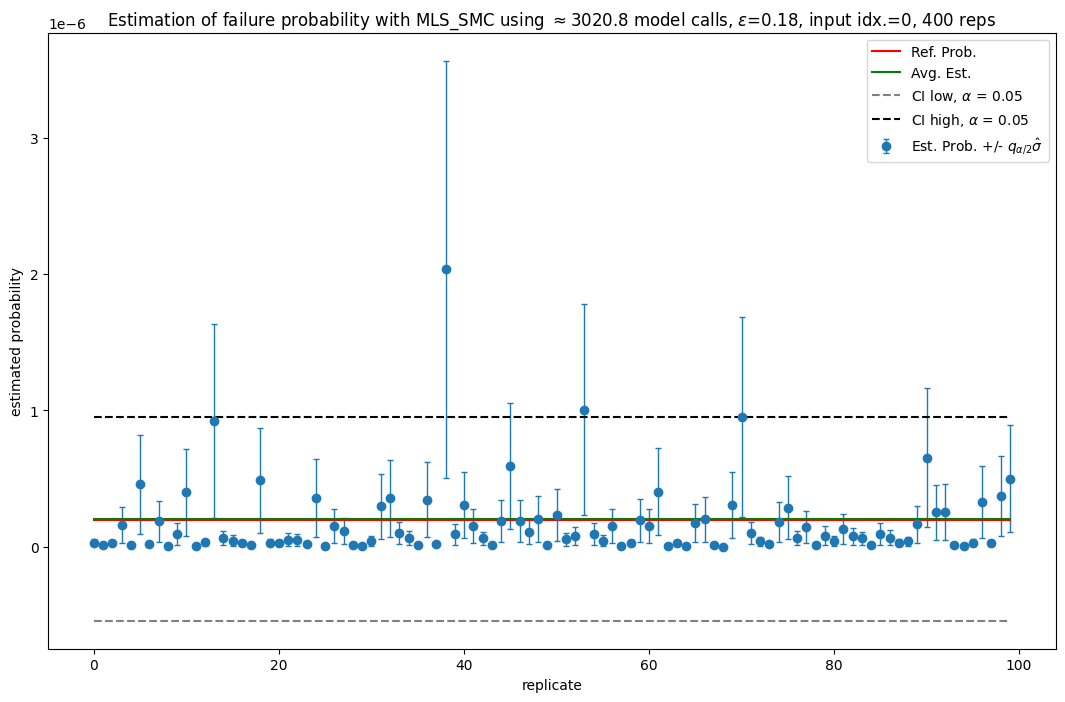

mean est:2.030089310665433e-07, std est:3.806595363073075e-07
mean calls:3020.8
std. re.:9236478.535736648
std. rel. adj.:27901554360.75327
mean rel. error:0.9982970764717206
std rel. error:1.6807389906467884
stat performance (per 1k calls):5.077176342945819
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 4/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:06<00:00, 58.53it/s]


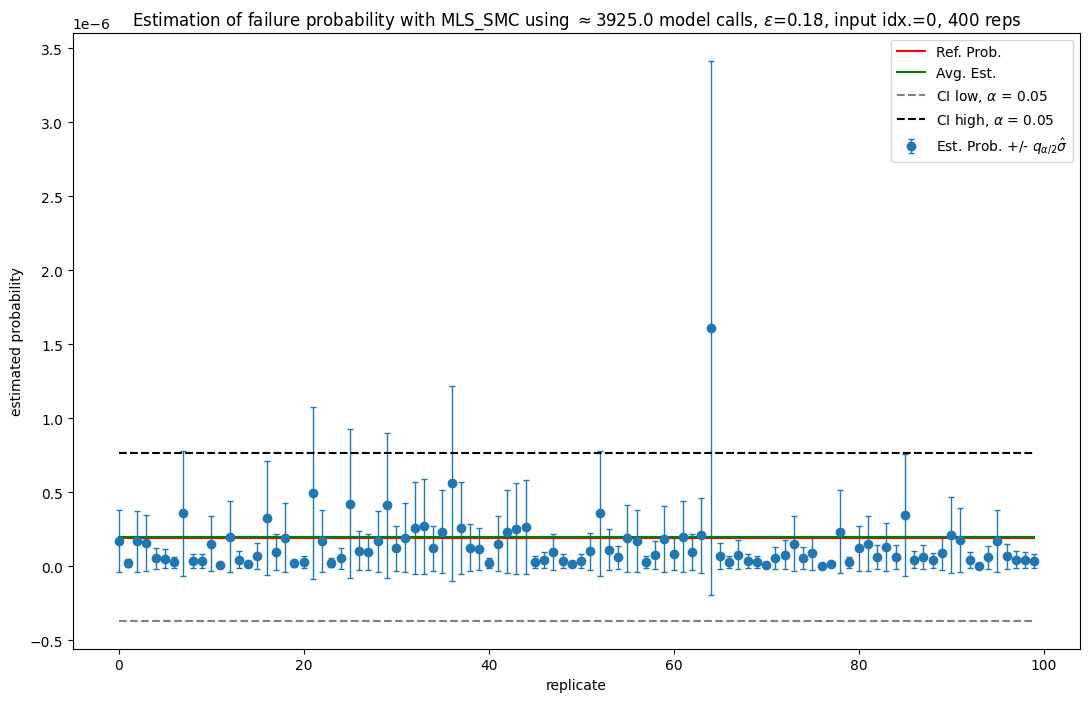

mean est:1.989755904000001e-07, std est:2.8851231379920513e-07
mean calls:3925.0
std. re.:7287268.13511654
std. rel. adj.:28602527430.33242
mean rel. error:0.9049656185190745
std rel. error:1.172919647827694
stat performance (per 1k calls):4.603709617723698
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 5/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 5: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 6/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:47<00:00,  8.44it/s]


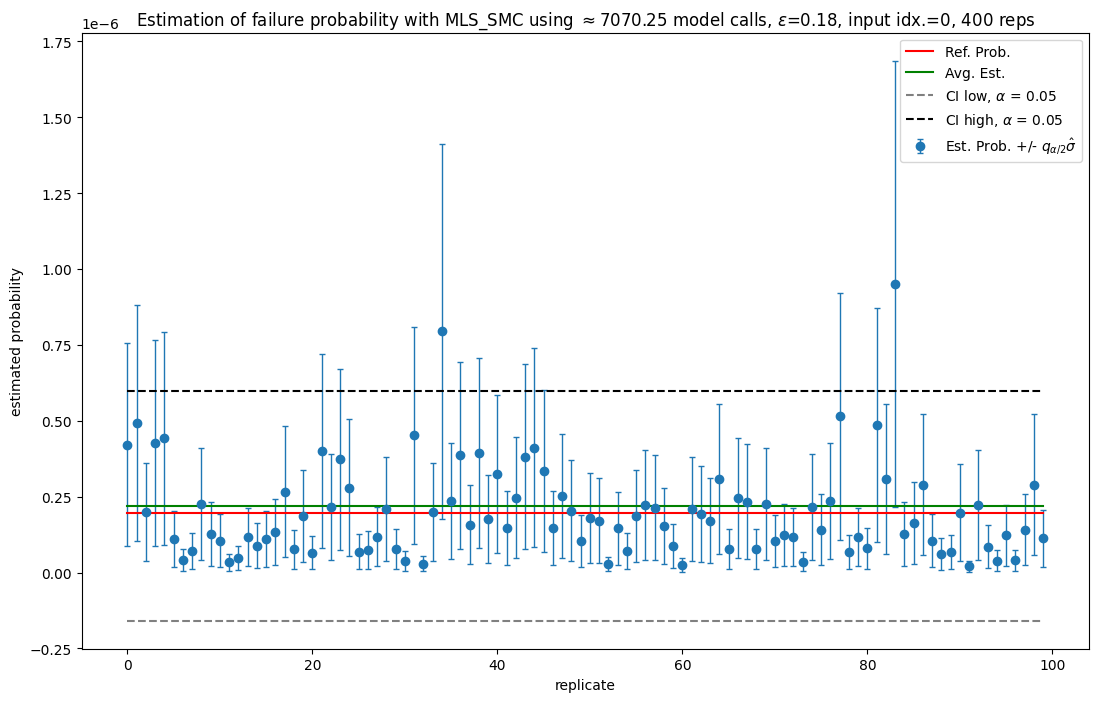

mean est:2.2047144103928907e-07, std est:1.934614938901134e-07
mean calls:7070.25
std. re.:3980062.1663511163
std. rel. adj.:28140034531.64398
mean rel. error:0.6768347590548217
std rel. error:0.7388596741125915
stat performance (per 1k calls):5.223922610894549
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 7/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:12<00:00, 32.06it/s]


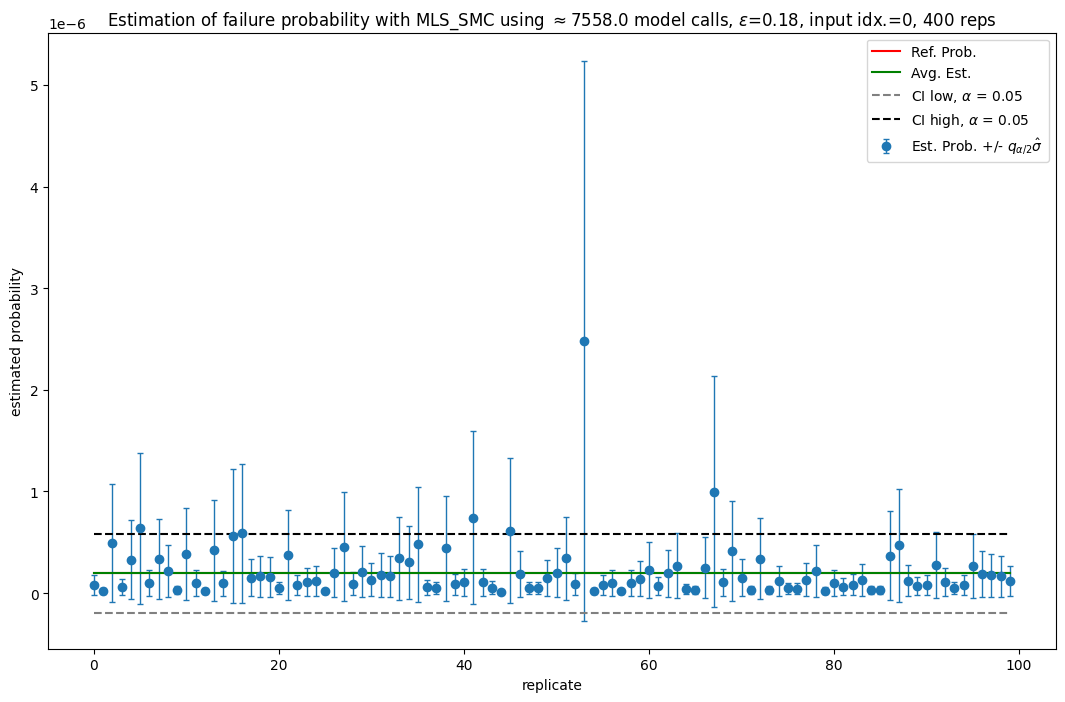

mean est:1.9587737600000007e-07, std est:1.9896309938591392e-07
mean calls:7558.0
std. re.:5185659.330397955
std. rel. adj.:39193213219.14774
mean rel. error:0.6313136119643885
std rel. error:0.803114793544009
stat performance (per 1k calls):6.06994160960562
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 8/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 10: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 9/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [01:27<00:00,  4.58it/s]


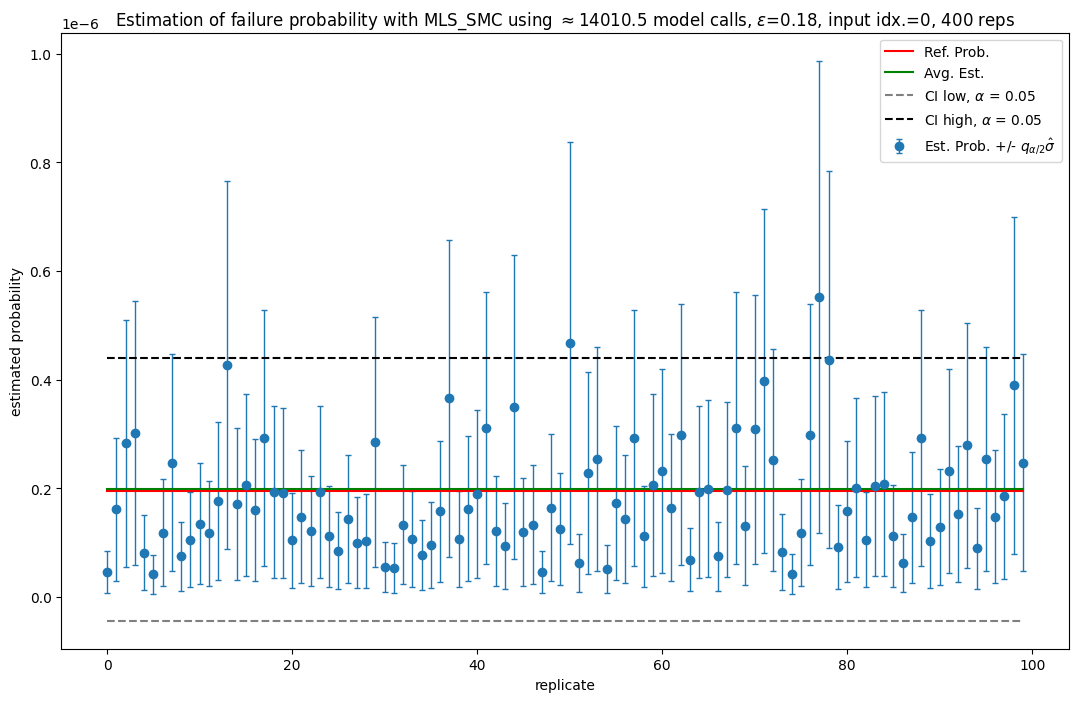

mean est:1.980917854243897e-07, std est:1.2330792795735818e-07
mean calls:14010.5
std. re.:3142375.4075376876
std. rel. adj.:44026250647.30677
mean rel. error:0.4850195461083376
std rel. error:0.40725335476123237
stat performance (per 1k calls):5.705823126882247
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 10/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:23<00:00, 17.05it/s]


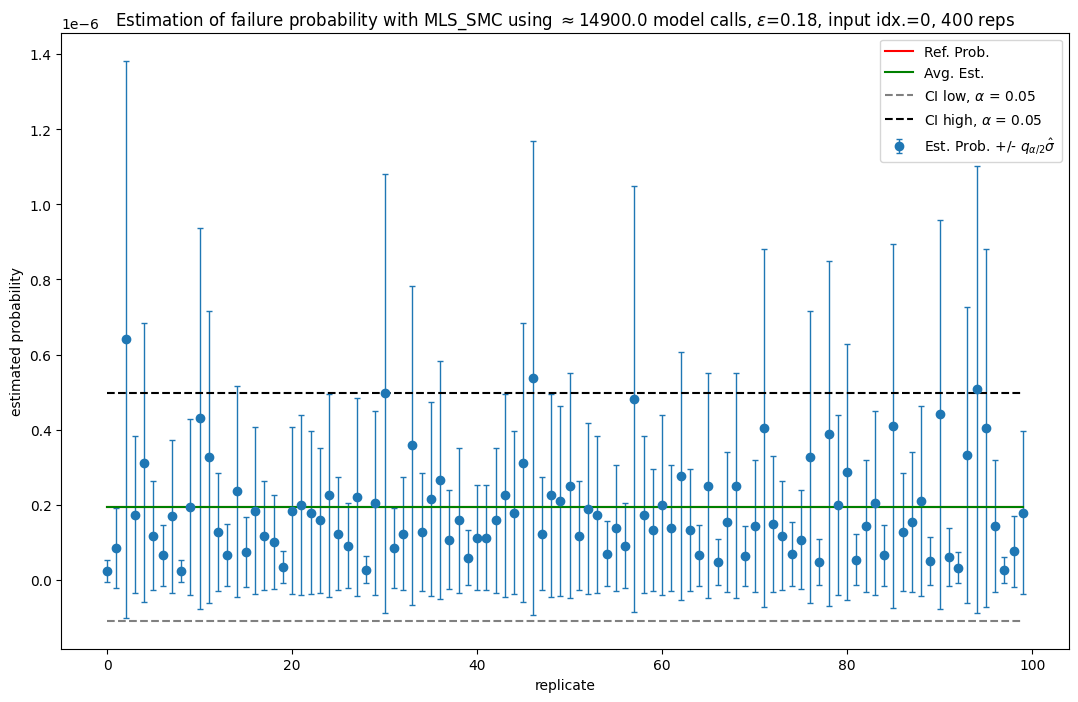

mean est:1.9379353600000009e-07, std est:1.5431844385354047e-07
mean calls:14900.0
std. re.:4109029.5186665524
std. rel. adj.:61224539828.13163
mean rel. error:0.525062611270226
std rel. error:0.593371621928221
stat performance (per 1k calls):8.841237166730494
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 11/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 20: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 12/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [02:45<00:00,  2.41it/s]


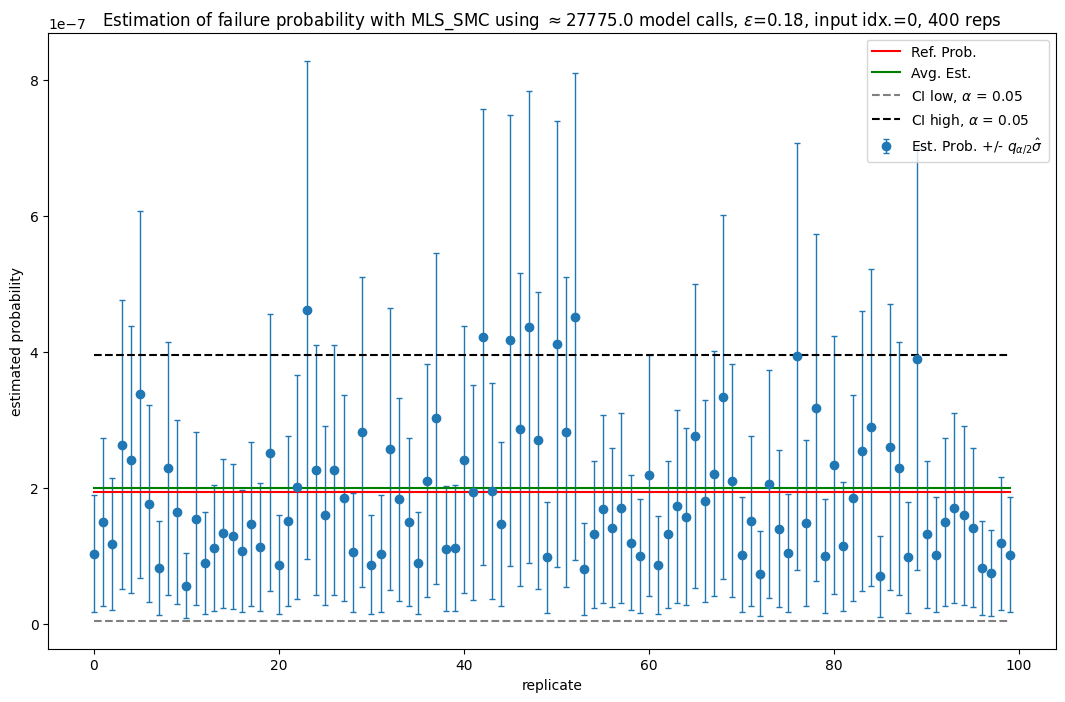

mean est:2.004998278246306e-07, std est:9.981649596328191e-08
mean calls:27775.0
std. re.:2482986.23501959
std. rel. adj.:68964942677.66911
mean rel. error:0.3995672445535278
std rel. error:0.32225851548204204
stat performance (per 1k calls):8.950730267513718
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 13/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 2: ratio: 0.2: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 14/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 2: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 15/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 2: ratio: 0.8: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 16/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 5: ratio: 0.2: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 17/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 5: ratio: 0.5: s:

100%|██████████| 400/400 [00:28<00:00, 14.14it/s]


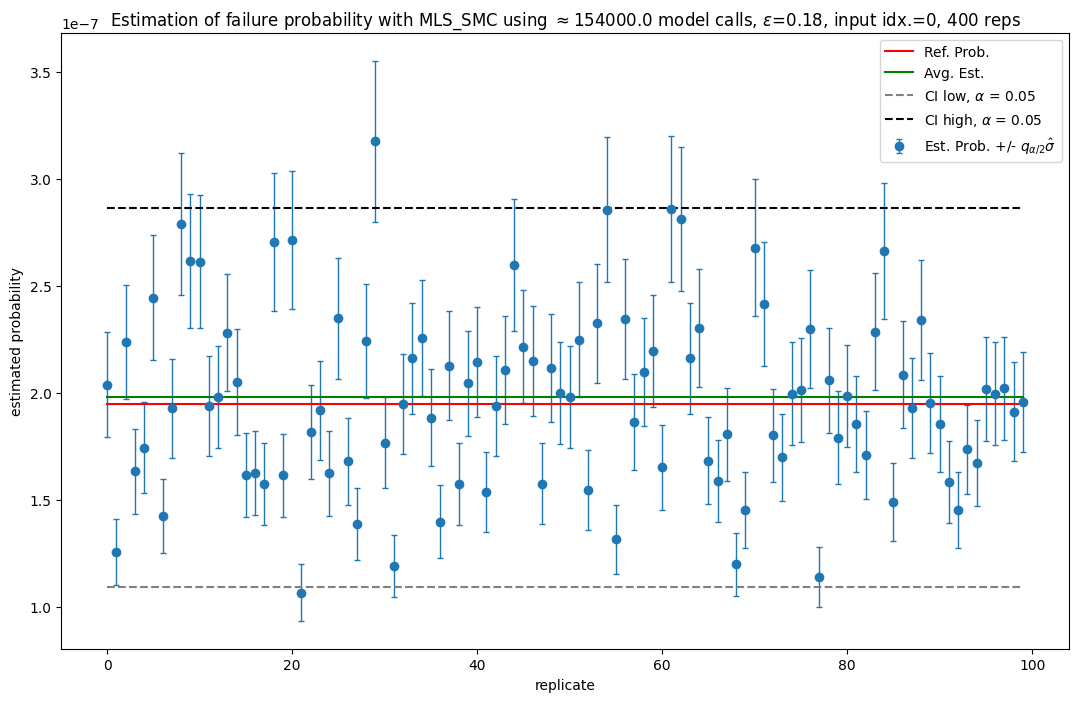

mean est:1.979388160000001e-07, std est:4.514393593140662e-08
mean calls:154000.0
std. re.:1152225.505896107
std. rel. adj.:177442727908.0005
mean rel. error:0.18283861904944043
std rel. error:0.14337672351169609
stat performance (per 1k calls):22.080015420801196
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 26/36, with model: mnist_model, img_idx:0,eps:0.18,N: 10000: T: 2: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 27/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:45<00:00,  8.89it/s]


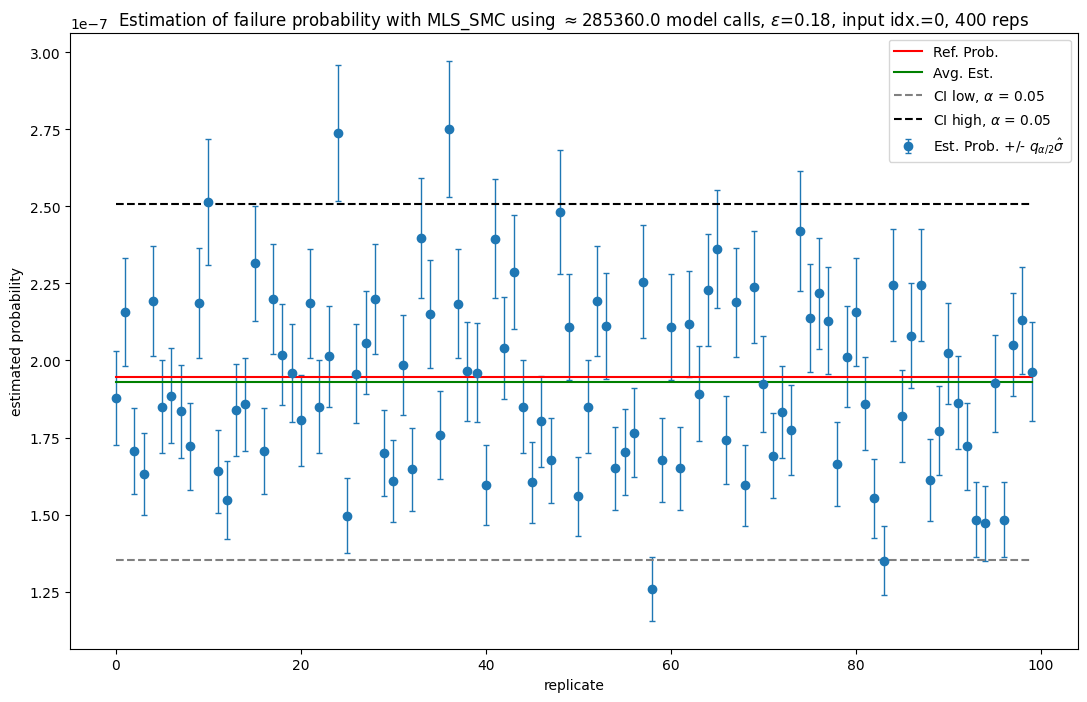

mean est:1.9296330707591091e-07, std est:2.9496031735126003e-08
mean calls:285360.0
std. re.:792162.2173306997
std. rel. adj.:226051410337.48846
mean rel. error:0.12354614923508278
std rel. error:0.08807117982527976
stat performance (per 1k calls):25.131991874941832
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 28/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [01:02<00:00,  6.38it/s]


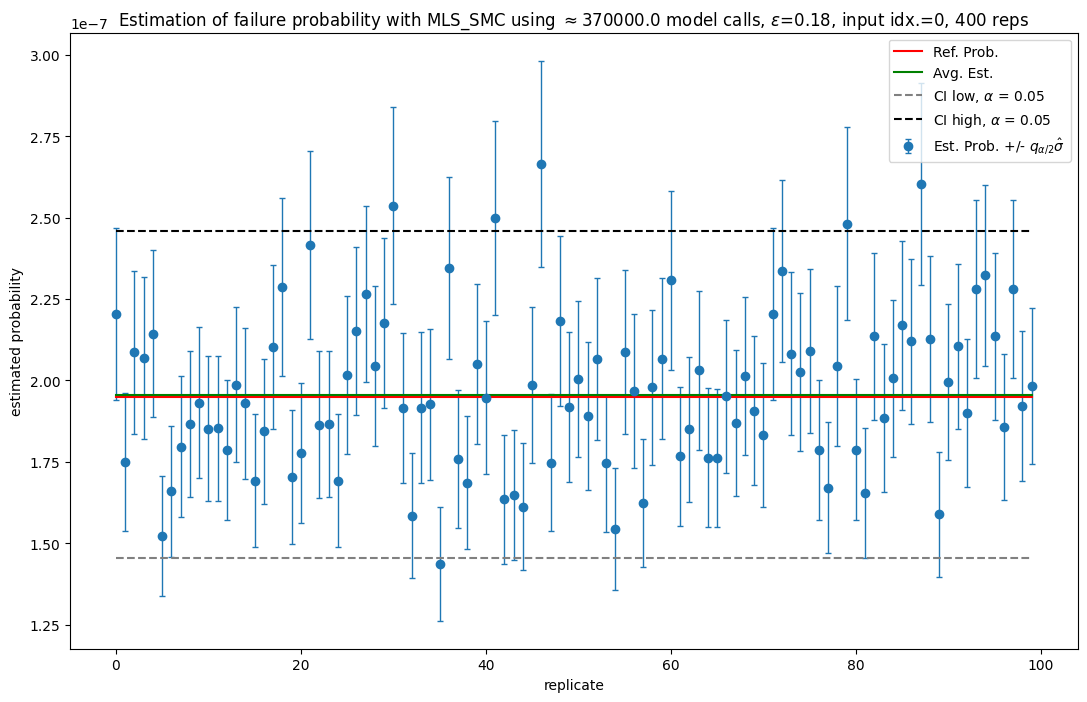

mean est:1.956034560000001e-07, std est:2.5601730276246266e-08
mean calls:370000.0
std. re.:669138.8878706456
std. rel. adj.:247581388512.1389
mean rel. error:0.1042850428023852
std rel. error:0.08013071454716611
stat performance (per 1k calls):29.64836438245146
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 29/36, with model: mnist_model, img_idx:0,eps:0.18,N: 10000: T: 5: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 30/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [01:21<00:00,  4.89it/s]


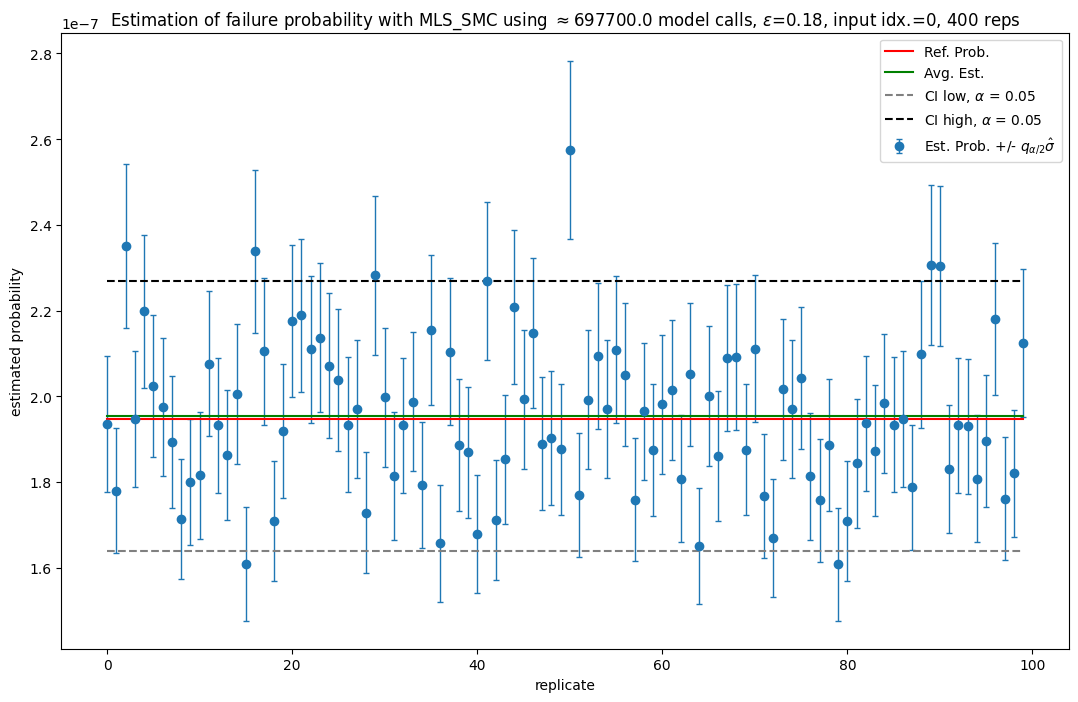

mean est:1.9546001442857874e-07, std est:1.604172842623676e-08
mean calls:697700.0
std. re.:419889.78256965044
std. rel. adj.:292957101298.8451
mean rel. error:0.06407776132248787
std rel. error:0.05186651109623795
stat performance (per 1k calls):36.18726479184522
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 31/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [01:59<00:00,  3.35it/s]


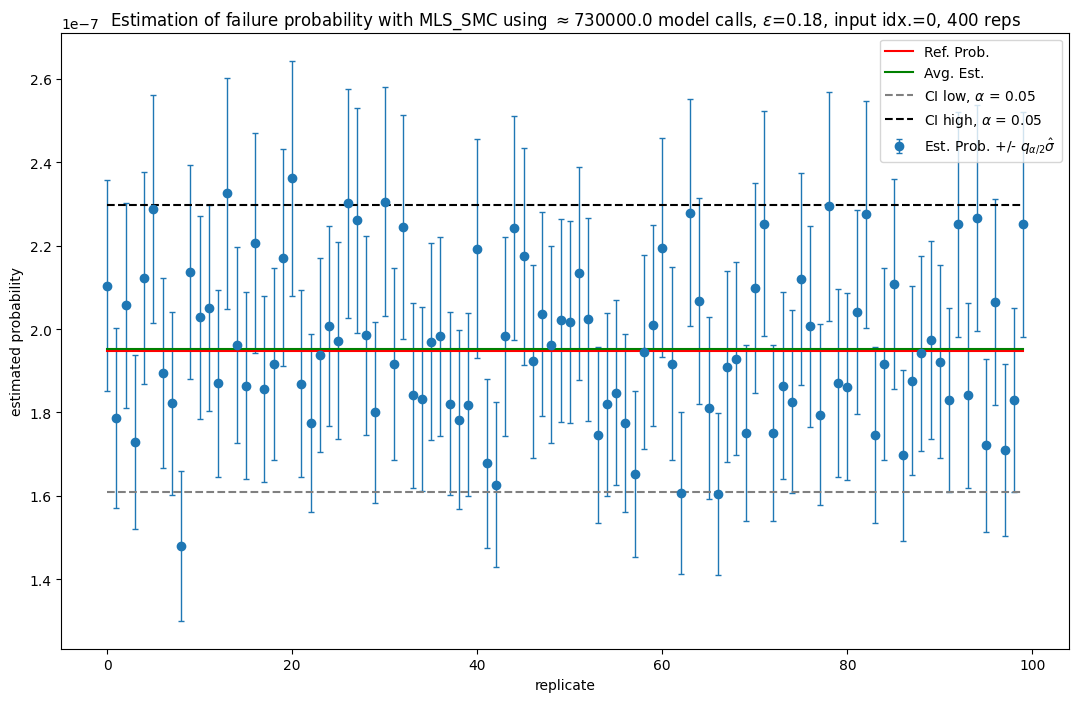

mean est:1.952828160000001e-07, std est:1.7584000170511382e-08
mean calls:730000.0
std. re.:461094.1595181243
std. rel. adj.:336598736448.2307
mean rel. error:0.07208558529043715
std rel. error:0.054416965475629
stat performance (per 1k calls):39.72438479720917
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 32/36, with model: mnist_model, img_idx:0,eps:0.18,N: 10000: T: 10: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 33/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [02:22<00:00,  2.80it/s]


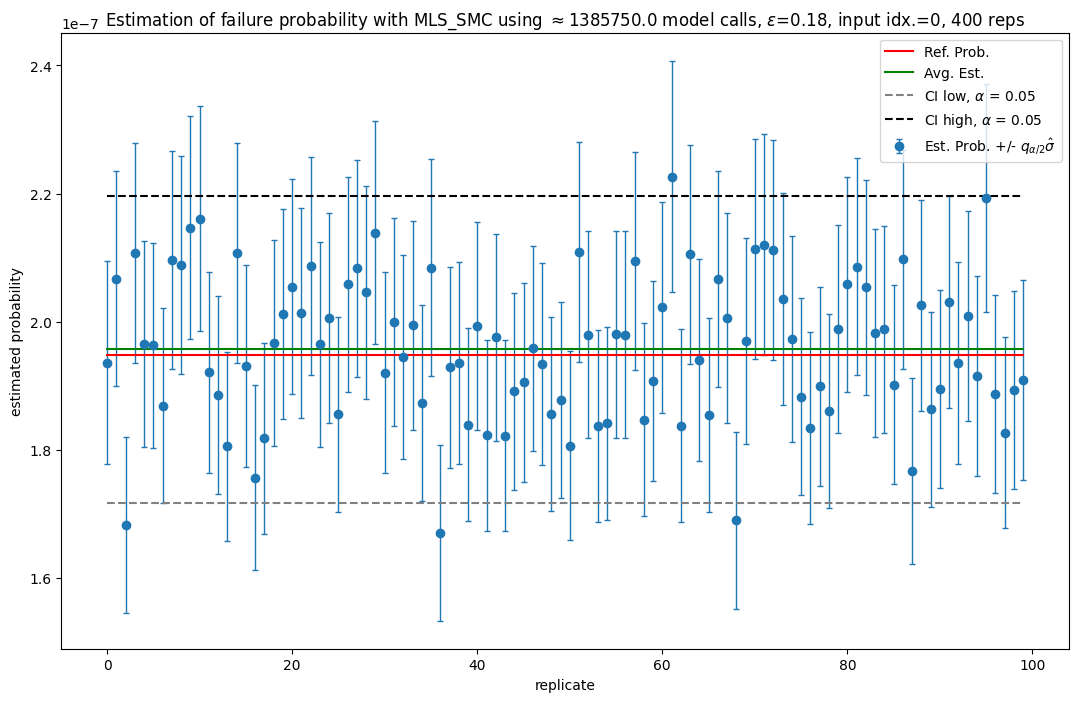

mean est:1.9570929294240766e-07, std est:1.2232515776016742e-08
mean calls:1385750.0
std. re.:319369.09577236534
std. rel. adj.:442565724466.5553
mean rel. error:0.05082101551076172
std rel. error:0.03721450987501363
stat performance (per 1k calls):51.57000705930014
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 34/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [03:53<00:00,  1.72it/s]


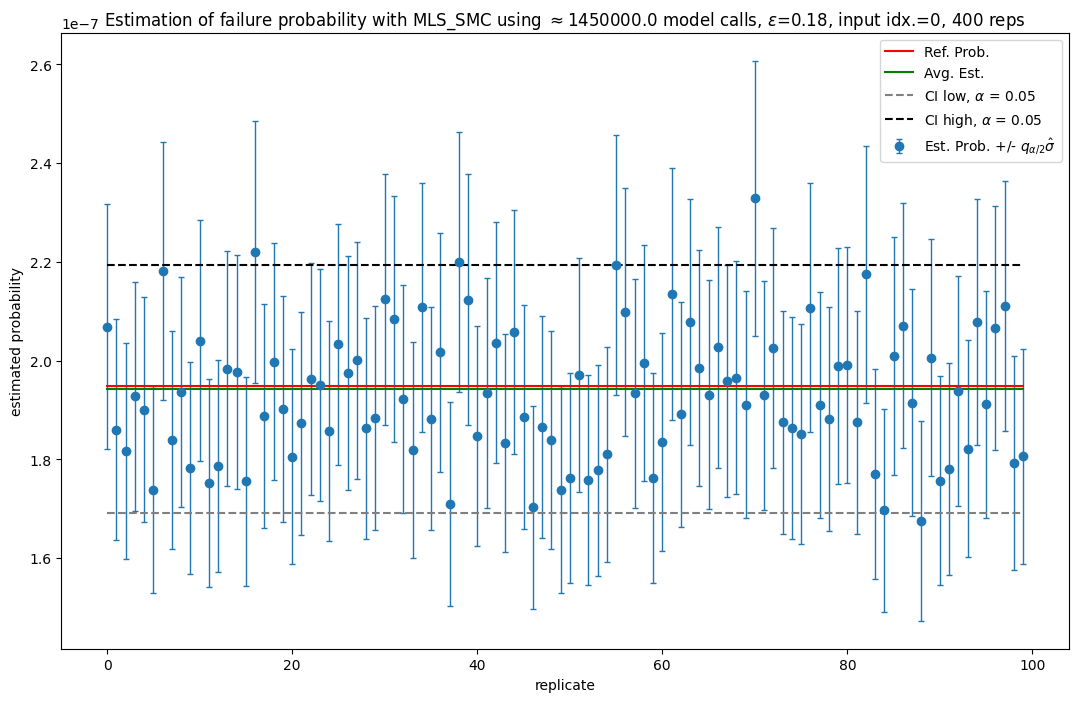

mean est:1.9425139200000008e-07, std est:1.2787616588369242e-08
mean calls:1450000.0
std. re.:338892.0079737974
std. rel. adj.:491393411562.0062
mean rel. error:0.053466509459281275
std rel. error:0.03819675438588315
stat performance (per 1k calls):55.38529385953057
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 35/36, with model: mnist_model, img_idx:0,eps:0.18,N: 10000: T: 20: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 36/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [04:23<00:00,  1.52it/s]


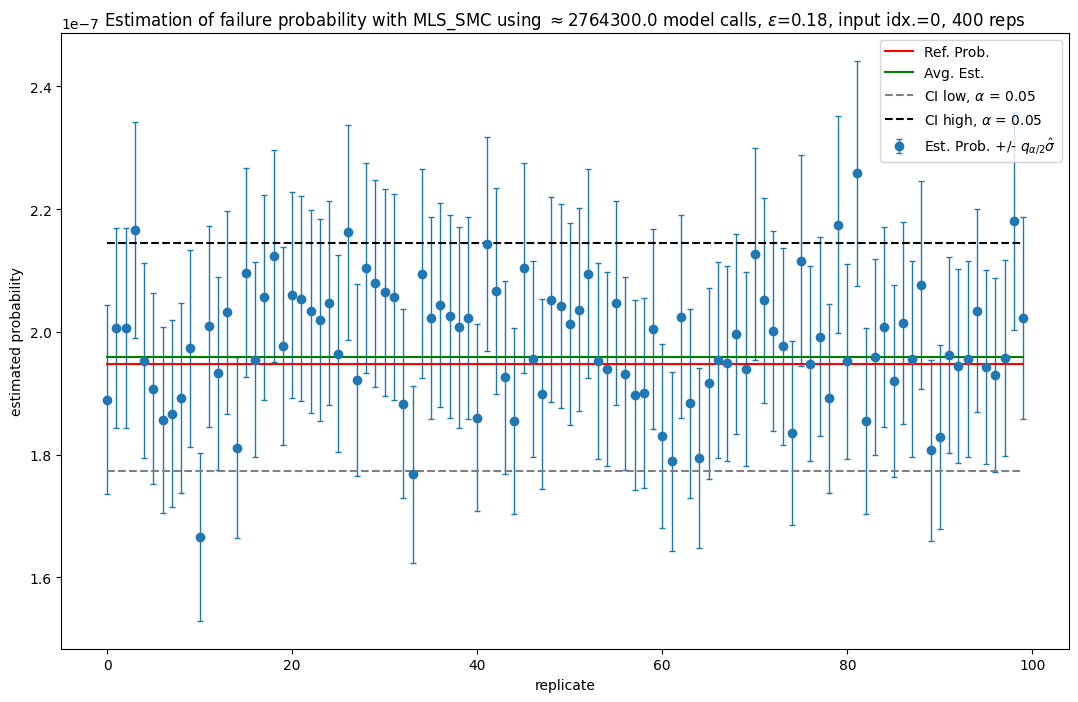

mean est:1.9588075965948228e-07, std est:9.473357237264925e-09
mean calls:2764300.0
std. re.:246899.582459781
std. rel. adj.:682504515793.5726
mean rel. error:0.03863108353541863
std rel. error:0.030097600714562123
stat performance (per 1k calls):83.19879765526409
p_fail_mls: 2.0176766465951106e-07


In [18]:
p_fail_mls,dict_out=run_exp.run_est(model=model,method='amls_batch',X=X,y=y,dataset_name=dataset,
                        epsilon_range=epsilon_range, n_rep=400, update_aggr_res=True, 
                         N_range=[100,100,10000, 
                                  ],T_range=[2,5,10,20],ratio_range=[0.2,0.5,0.8,],repeat_exp=False,
                        verbose=0,np_seed=0, torch_seed=0,p_ref = p_ref)
exp_config,method_config_mls, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mls = dict_out['results_df']
print(f"p_fail_mls: {p_fail_mls}")

In [ ]:
p_fail_mala, dict_out=run_exp.run_stat_rel_exp(model=model,method='mala',X=X,y=y,dataset_name='mnist',
                        n_rep=1, verbose=0, track_accept=False,ess_alpha_range=[0.7,0.8],
                        alpha=0.2, L_range=[1], adapt_func='simp_ess',p_ref=p_ref,
                         N_range=[3000],T_range=[20],epsilon_range=epsilon_range,repeat_exp=True,
 )
exp_config,method_config_mala, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mala = dict_out['results_df']
print(f"p_fail_mala={p_fail_mala}")

[[3000], [20], [0.7, 0.8], [0.2], [1]]
{'N_range': [3000], 'T_range': [20], 'ess_alpha_range': [0.7, 0.8], 'alpha_range': [0.2], 'L_range': [1]}
Starting MALA_SMC simulation 1/2, with model: mnist_model, img_idx:0,eps:0.18,N: 3000: T: 20: ess_alpha: 0.7: alpha: 0.2: L: 1


100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


mean est:7.125619845282927e-07, std est:0.0
mean calls:1806200.0
std. re.:0.0
std. rel. adj.:0.0
Starting MALA_SMC simulation 2/2, with model: mnist_model, img_idx:0,eps:0.18,N: 3000: T: 20: ess_alpha: 0.8: alpha: 0.2: L: 1


100%|██████████| 1/1 [00:03<00:00,  3.41s/it]


mean est:1.429374947292672e-06, std est:0.0
mean calls:1792200.0
std. re.:0.0
std. rel. adj.:0.0
p_fail_mala=1.0709684659104823e-06


with parameters in {'N_range': [500], 'T_range': [20], 'ess_alpha_range': [0.875], 'alpha_range': [0.2], 'L_range': [1]}
Starting MALA_SMC simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


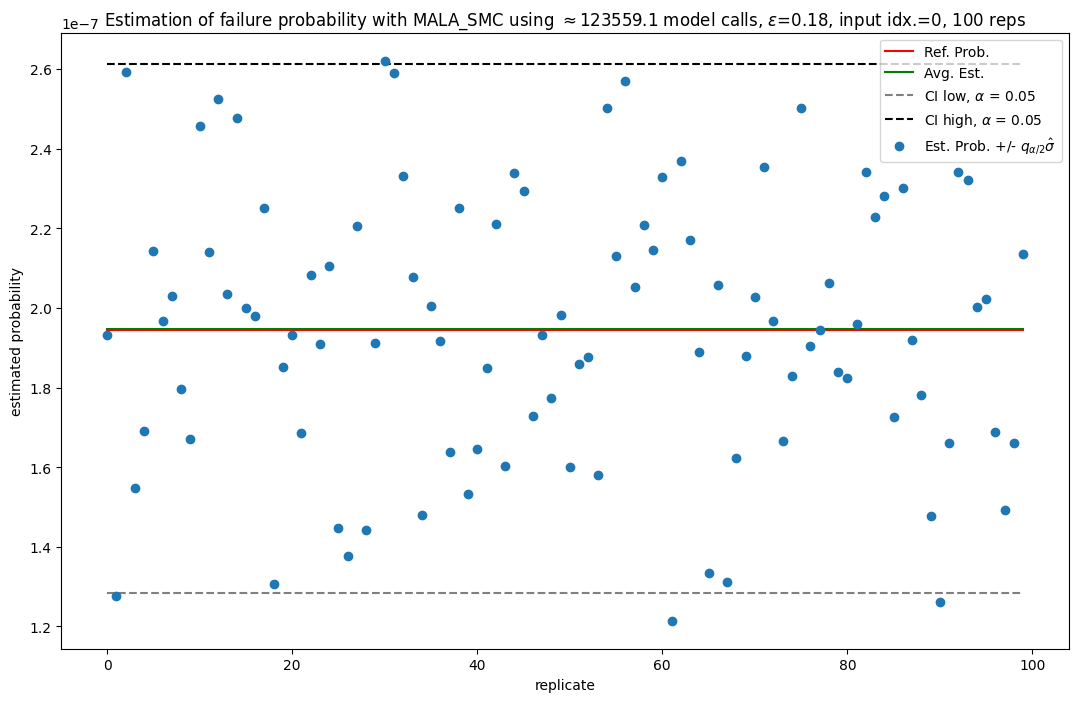

mean est:1.947763398391089e-07, std est:3.3910787382815905e-08
mean calls:123559.1
std. re.:893851.7050677764
std. rel. adj.:110443512211.6399
mean rel. error:0.14067106655076209
std rel. error:0.10307205941389559
stat performance (per 1k calls):12.735490896327468
p_fail_mala=1.947763398391089e-07


In [83]:
p_fail_mala, dict_out=run_exp.run_est(model=model,method='mala2',X=X,y=y,dataset_name='mnist',
                        n_rep=100, verbose=0, track_accept=False,ess_alpha_range=[0.875],
                        alpha=0.2, L_range=[1], adapt_func='simp_ess',p_ref=p_ref,
                         N_range=[500],T_range=[20],epsilon_range=epsilon_range,repeat_exp=True,
 )
exp_config,method_config_mala, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mala = dict_out['results_df']
print(f"p_fail_mala={p_fail_mala}")

In [4]:
p_fail_form,dict_out_form = run_exp.run_est(model=model,method='form',X=X,y=y,dataset_name='mnist',
                    search_method='carlini',epsilon_range = epsilon_range,
                    steps_range=[1000,],num_iter_range=[10],stepsize_range=[1e-2],
                    repeat_exp=True, random_init=False, 
                    sigma_init=0.000001,
                        
                        
                        n_rep=1, verbose=0,p_ref=p_ref)

NameError: name 'model' is not defined

In [78]:
p_fail_mc, dict_out_mc = run_exp.run_est(model=model, method = 'CrudeMC',
            X=X, y=y, dataset_name='mnist',epsilon_range=epsilon_range,
            repeat_exp=True,n_rep=5, 
            N_range=[int(1e8)],batch_size_range=[int(4e5)],track_advs=False) 

with parameters in {'N_range': [100000000], 'batch_size_range': [400000]}
Starting CrudeMC simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18,


 20%|██        | 1/5 [00:34<02:16, 34.19s/it]


KeyboardInterrupt: 

In [53]:
exp_config.model

dnn2(
  (linear1): Linear(in_features=784, out_features=200, bias=True)
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (flat_op): Flatten()
)

## 4. Analysis of Experiments

In [65]:
eps=0.18

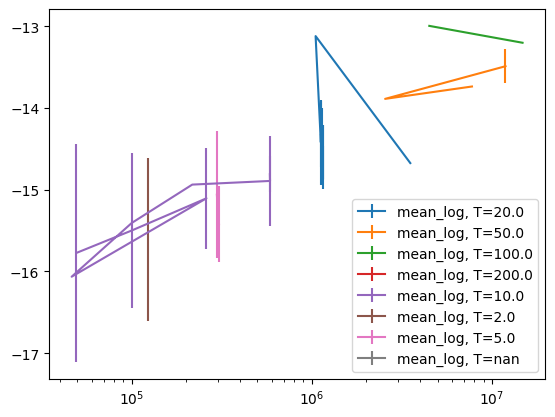

In [68]:
fig=plt.figure()
ax=plt.axes()
ax.set_xscale('log')
mls_webb_df=  utils.get_sel_df(df=agg_res_df,triplets=[('method_name','MALA_SMC','='),])
for T in agg_res_df['T'].unique():
    df = utils.get_sel_df(mls_webb_df,triplets=[('T',T,'='),('epsilon',eps,'=')])
    ax.errorbar(x=df['mean_calls'],y=df['mean_log_est'], yerr=df['std_log_est'],label=f'mean_log, T={T}',)
    ax.legend()

